Assignment 1: Descriptive Statistics and Probability Theory

- Task is to clean the data as you see fit, 
- and conduct exploratory analysis which will help the company build a sales strategy for the following year.

In addition to the analysis,  following questions responses are added as marked down in the end

1) What conclusions can you draw about sales performance of various products and regions?
2) What recommendations do you have for the business?
3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Sales Data file from local source

In [ ]:
df2 = pd.read_csv('C:/Users/Saima Rafi/Desktop/York/Data Science/Assignment/sales_data.csv')

To view the dataset

In [6]:
df2

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


Updating headers  name in below context where space was available so the same can be use easily and accessible in code

In [20]:
df2=df2.rename(columns={'Units Sold':'Units_Sold'})
df2=df2.rename(columns={'Sale Date':'Sale_Date'})
df2

,Product,Region,Price,Units_Sold,Sale_Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


info()  is used to understand data quality type and statistics, as per below it is reflected that there are blank fileds available in Product, Region, Price and Units_sold column

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units_Sold  946 non-null    float64
 4   Sale_Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [22]:
df2.describe()

,Price,Units_Sold
count,945.000000,946.000000
mean,107.598688,10.048626
std,124.020322,3.172261
min,0.200000,2.000000
25%,29.430000,8.000000
50%,78.130000,10.000000
75%,142.570000,12.000000
max,2143.300000,22.000000


In [23]:
df2.isna().count()

Product       1050
Region        1050
Price         1050
Units_Sold    1050
Sale_Date     1050
dtype: int64

Visulaizing the data to identify issues and outlier

<Axes: xlabel='Price', ylabel='Count'>

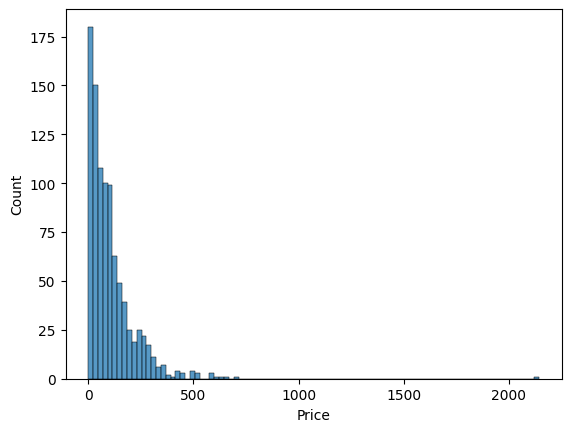

In [24]:
sns.histplot(df2.Price)

<Axes: xlabel='Units_Sold', ylabel='Count'>

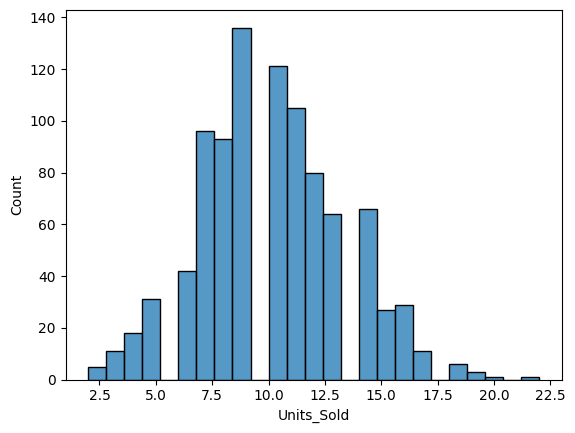

In [25]:
sns.histplot(df2.Units_Sold)

below boxplot are vizulaized on Price and Units_Sold filed to view if any outlier exisits

<Axes: >

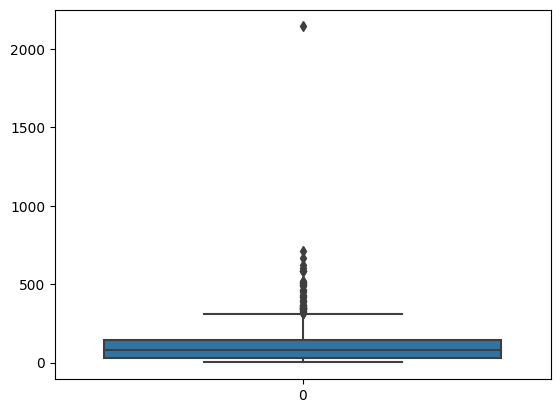

In [26]:
sns.boxplot(df2.Price)

<Axes: >

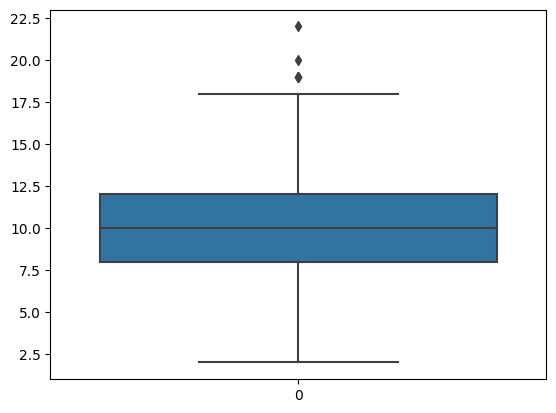

In [27]:
sns.boxplot(df2.Units_Sold)

In [54]:
max_values = df2.Price.max()
print(max_values)

2143.3


Copying dataframe in df3 as data will be adjusted for further analysis

In [83]:
df3=df2

Replacing missing values in Price and Units_Sold column by mean and median of respective column

In [84]:
df3['Price'] = df3['Price'].fillna(df3['Price'].mean())
df3['Units_Sold'] = df3['Units_Sold'].fillna(df3['Units_Sold'].median())

Dropping the maximum value from Price column

In [85]:
df3 = df3.loc[df3['Price']!=df3['Price'].max()]
df3

,Product,Region,Price,Units_Sold,Sale_Date
0,NaN,Region_6,75.960000,10.0,2022-01-01
1,NaN,Region_1,175.780000,8.0,2022-01-02
2,Product_46,Region_3,20.430000,12.0,2022-01-03
3,Product_36,Region_1,12.770000,10.0,2022-01-04
4,Product_17,Region_6,125.690000,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.690000,8.0,2022-07-28
1046,Product_1,Region_6,107.598688,8.0,2022-08-02
1047,Product_17,Region_2,114.370000,11.0,2023-12-18
1048,NaN,Region_8,107.598688,5.0,2023-12-27


In [86]:
df3.info()
df3.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1049 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     946 non-null    object 
 1   Region      945 non-null    object 
 2   Price       1049 non-null   float64
 3   Units_Sold  1049 non-null   float64
 4   Sale_Date   1049 non-null   object 
dtypes: float64(2), object(3)
memory usage: 49.2+ KB


,Price,Units_Sold
count,1049.000000,1049.000000
mean,105.658076,10.053439
std,99.481824,3.008298
min,0.200000,2.000000
25%,33.850000,8.000000
50%,88.440000,10.000000
75%,133.150000,12.000000
max,713.290000,22.000000


Visualizing the data for further issues and outlier consideration after adjusting Price and Sales_Units column by using mean for NaN and Maximum price drop

<Axes: xlabel='Price', ylabel='Count'>

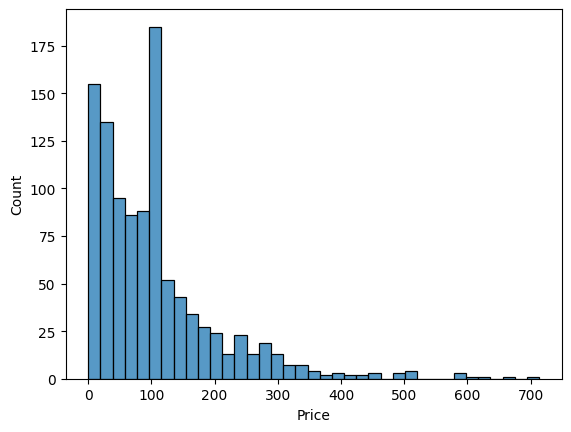

In [87]:
sns.histplot(df3.Price)

<Axes: xlabel='Units_Sold', ylabel='Count'>

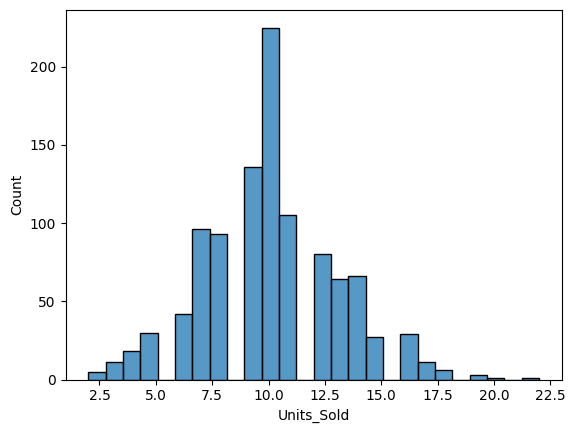

In [88]:
sns.histplot(df3.Units_Sold)

<Axes: >

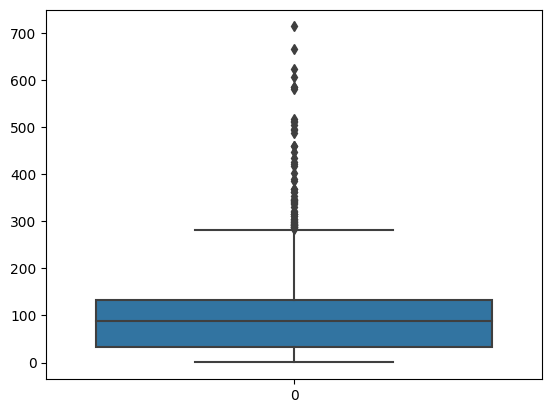

In [89]:
sns.boxplot(df3.Price)

<Axes: >

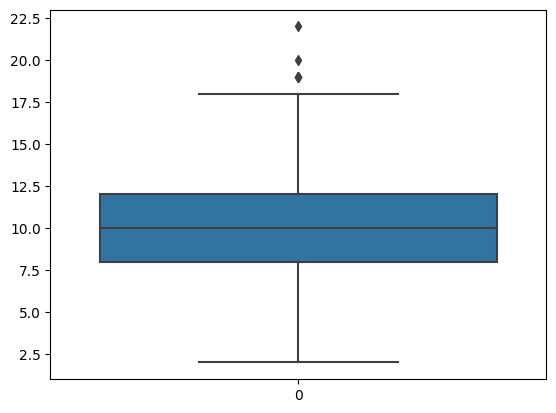

In [90]:
sns.boxplot(df3.Units_Sold)

Adding and calculating Sales_Value Column

In [101]:
Sales_Values = df3.Price * df3.Units_Sold

In [103]:
df3['Sales_Value'] = Sales_Values

C:\Users\Saima Rafi\AppData\Local\Temp\ipykernel_15232\4216362870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Sales_Value'] = Sales_Values


In [104]:
df3

,Product,Region,Price,Units_Sold,Sale_Date,Sales_Value
0,NaN,Region_6,75.960000,10.0,2022-01-01,759.600000
1,NaN,Region_1,175.780000,8.0,2022-01-02,1406.240000
2,Product_46,Region_3,20.430000,12.0,2022-01-03,245.160000
3,Product_36,Region_1,12.770000,10.0,2022-01-04,127.700000
4,Product_17,Region_6,125.690000,6.0,2022-01-05,754.140000
...,...,...,...,...,...,...
1045,Product_45,Region_7,78.690000,8.0,2022-07-28,629.520000
1046,Product_1,Region_6,107.598688,8.0,2022-08-02,860.789503
1047,Product_17,Region_2,114.370000,11.0,2023-12-18,1258.070000
1048,NaN,Region_8,107.598688,5.0,2023-12-27,537.993439


Product and Region data cleaning has not been made based on assumption as this may skew the data outcome in favor/ against a product or Region, however we may adopt the approach to assign Region and Product to NaN field on management assumption

Below analysis are followed
Identify Top Performer
    Analyzing which Products gives contributed to Sales_Values
    Analyzing Top Region for sales in terms of Sales_Values
    Analyzing Top sold Product by demand/ count

Identify Under Performance
    Analyzing which Products gives lower by Sales_Values 
    Analyzing Region for lower sales in terms of Sales_Values
    Analyzing Product for whicih demand/ count remain low

In [110]:
df3_grouped=df3.groupby('Product')
df3_grouped.groups

{'Product_1': [711, 400, 490, 265, 1017, 709, 931, 1046, 213, 312, 994, 467, 88, 407, 964, 393, 11, 563, 424, 34, 15, 609, 503, 140, 848, 13], 'Product_10': [1022, 220, 934, 599, 666, 253, 294, 643, 47, 895, 375, 673, 648, 449, 84, 754, 1032, 1007, 397], 'Product_11': [949, 361, 809, 202, 391, 455, 971, 350, 70, 868, 26, 256, 688, 371], 'Product_12': [536, 172, 576, 59, 882, 311, 521, 54, 627, 622, 801, 245, 173], 'Product_13': [403, 343, 676, 326, 35, 892, 237, 1002, 94, 522, 807, 49, 752, 364, 621, 113, 25, 389, 954, 720, 295, 204, 746, 156, 962], 'Product_14': [264, 546, 473, 842, 889, 1011, 351, 587, 22, 845, 232, 832, 303, 369, 230, 651, 672, 468, 978, 574], 'Product_15': [834, 849, 924, 588, 92, 510, 286, 552, 667, 1005, 136, 780, 217, 356, 958, 745, 980, 595, 799], 'Product_16': [275, 796, 674, 916, 466, 930, 1049, 783, 819, 721, 735, 1026, 547, 914, 8, 491, 180, 153, 146, 505], 'Product_17': [624, 313, 267, 4, 1047, 716, 51, 192, 17, 712, 122, 227, 1036, 533, 71, 72, 148, 741, 

In [116]:
df3_grouped.get_group('Product_1')

,Product,Region,Price,Units_Sold,Sale_Date,Sales_Value
711,Product_1,Region_3,268.730000,8.000000,2023-12-13,2149.840000
400,Product_1,NaN,254.500000,10.048626,2023-02-05,2557.375264
490,Product_1,NaN,213.260000,12.000000,2023-05-06,2559.120000
265,Product_1,Region_1,158.050000,8.000000,2022-09-23,1264.400000
1017,Product_1,NaN,110.060000,9.000000,2023-12-11,990.540000
709,Product_1,NaN,110.060000,9.000000,2023-12-11,990.540000
931,Product_1,Region_2,107.598688,9.000000,2024-07-20,968.388190
1046,Product_1,Region_6,107.598688,8.000000,2022-08-02,860.789503
213,Product_1,Region_6,107.598688,8.000000,2022-08-02,860.789503
312,Product_1,Region_3,107.598688,10.000000,2022-11-09,1075.986878


In [117]:
df3_grouped.mean()

TypeError: can only concatenate str (not "int") to str

TypeError: 'NoneType' object is not iterable

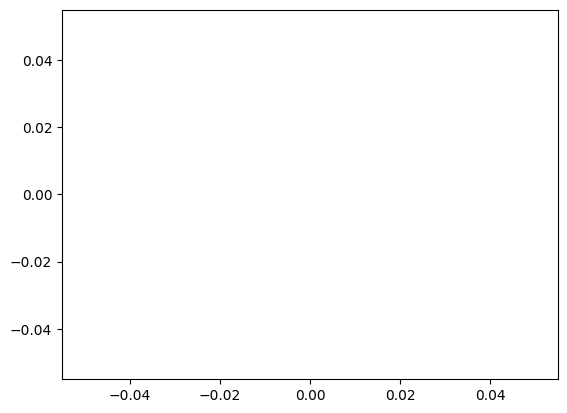

In [112]:
sns.histplot(df3_grouped)

In [109]:
df3.groupby('Product')['Sales_Value'].nlargest(10) 

Product       
Product_1  490    2559.120000
           400    2557.375264
           711    2149.840000
           265    1264.400000
           407    1263.040000
                     ...     
Product_9  298     969.400000
           854     882.720000
           405     750.540000
           394     696.500000
           642     522.960000
Name: Sales_Value, Length: 500, dtype: float64

In [108]:
df3[df3['Product'] == 1].sort_values('Product')['Sales_Values'].head(10)

KeyError: 'Sales_Values'

<Axes: xlabel='Product', ylabel='Count'>

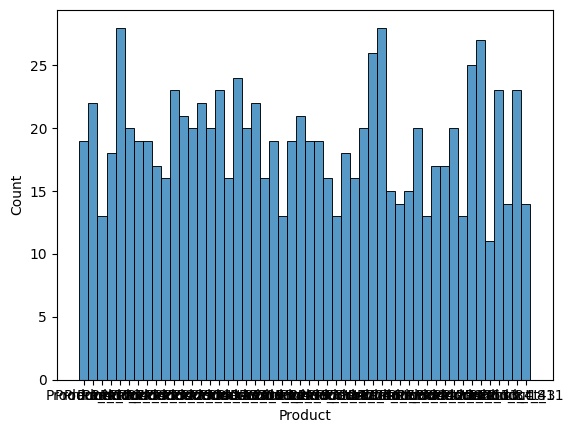

In [107]:
sns.histplot(df3.Product)

1) What conclusions can you draw about sales performance of various products and regions?
2) What recommendations do you have for the business?
3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?